# Syn data performance
> coPTR vs aPTR on synthetic dataset

In [116]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First things first
Are there even any overlaps?

In [118]:
coptr_ptrs = pd.read_csv(
    '../experiments/synthetic/coptr_out/coptr_log2_ptrs.csv', 
    dtype={0: str}
)
coptr_ptrs = coptr_ptrs.set_index('log2(PTR):genome_id/sample_id')
coptr_ptrs = 2**coptr_ptrs

In [119]:
coptr_ptrs

,SRR2081071,SRR2081072,SRR2081073,SRR2081074,SRR2081075,SRR2081082,SRR2081092,SRR2082404,SRR2082405,SRR2082406,...,SRR2082422,SRR2082423,SRR2082425,SRR2082426,SRR2082429,SRR2082443,SRR2082445,SRR2082446,SRR2082447,SRR2082449
log2(PTR):genome_id/sample_id,,,,,,,,,,,,,,,,,,,,,
1384484.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114320,NaN
209261.6,1.152145,1.089253,1.162372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026363,1.000007,1.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264199.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267747.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.087795,NaN,NaN,1.028200,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.250035,1.269629,1.245936,1.266868,1.358720,NaN
295319.15,1.000007,1.015478,1.000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046612,1.106495,1.231776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326425.4,1.945028,1.988953,1.964543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.856641,NaN,NaN,NaN,NaN,NaN,NaN
367928.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982724,2.109885,NaN
390333.7,1.499257,1.507926,1.473531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# aptr_path = '../experiments/synthetic/aptr_out_100_nofilter/inferred_ptrs.tsv'
aptr_path = '../experiments/synthetic/aptr_out_99_nofilter/inferred_ptrs.tsv'
aptr_ptrs = pd.read_csv(aptr_path, sep='\t', dtype={0: str})
aptr_ptrs = aptr_ptrs.set_index('Unnamed: 0')
aptr_ptrs

,SRR2079821,SRR2080619,SRR2080621,SRR2080623,SRR2080624,SRR2080625,SRR2080626,SRR2080627,SRR2080628,SRR2080629,...,SRR2081059,SRR2081060,SRR2081061,SRR2081062,SRR2081064,SRR2081065,SRR2081066,SRR2081067,SRR2081068,SRR2081069
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
390333.7,4.805342e-04,4.737949e-04,7.235103e-04,4.561554e+00,4.966218e-03,3.247470e+00,2.332423e-02,2.153976e-03,4.128017e-03,3.116941e+00,...,3.681958e+00,3.172624e+00,3.147905e+00,2.923513e+00,5.796643e+00,5.782745e+00,5.767940e+00,5.568831e+00,5.600999e+00,5.528299e+00
1492.48,1.602056e+00,1.617685e+00,1.502319e+00,2.178795e+00,1.730669e+02,2.568874e+18,1.875346e+00,3.214466e+02,1.892551e+00,1.917281e+00,...,1.658519e+00,1.497710e+00,1.504342e+00,1.426141e+00,2.114449e+00,2.108739e+00,2.101726e+00,2.057130e+00,2.063653e+00,2.046617e+00
1069534.5,2.906894e+00,2.908004e+00,2.511827e+00,5.218345e+00,3.362462e+00,2.591946e+00,3.828096e+00,3.145083e+00,3.915281e+00,3.884047e+00,...,2.864773e+00,2.394794e+00,2.376978e+00,2.257554e+00,5.008736e+00,4.967322e+00,4.946785e+00,4.755964e+00,4.791366e+00,4.712752e+00
479436.6,2.296317e+00,2.236096e+00,2.000108e+00,3.617193e+00,1.858815e+00,4.759428e-11,2.699407e+00,1.482838e-03,2.817451e+00,2.668615e+00,...,2.237515e+00,1.968953e+00,1.970473e+00,1.894282e+00,1.892011e+00,6.286278e-01,1.363641e+00,3.143095e+00,2.851625e+00,2.374721e+00
435590.9,9.092708e-01,8.637546e-01,8.963347e-01,2.151181e-01,2.779874e+06,2.846794e+00,4.017638e+00,7.505715e-01,4.126400e+00,4.301052e+00,...,2.925957e+00,2.356834e+00,3.507983e+00,1.292616e+00,1.505214e+14,1.349322e+14,1.327648e+14,2.295256e+14,2.792281e+14,2.235579e+14
701521.8,2.193181e+00,2.193724e+00,1.996237e+00,3.169814e+00,2.356786e+00,2.037680e+00,2.539899e+00,2.423364e+00,2.579524e+00,2.494488e+00,...,2.119659e+00,1.931266e+00,1.929993e+00,1.877906e+00,2.903579e+00,2.880426e+00,2.879027e+00,2.807713e+00,2.824213e+00,2.793108e+00
637910.3,7.528593e+00,2.703609e+00,1.845126e+01,3.291507e+00,1.057892e+02,2.132786e+00,8.878148e+04,3.173362e+01,1.048729e+05,2.797101e+00,...,1.082087e+03,1.185769e+04,8.316670e+03,6.767294e+03,3.110604e+00,3.095669e+00,3.085918e+00,2.991960e+00,3.005577e+00,2.972860e+00
215689.3,1.407447e+00,1.414747e+00,1.281663e+00,1.856498e+00,1.368768e+00,1.447185e+00,1.519880e+00,6.522273e-01,1.545685e+00,1.611193e+00,...,1.197549e+00,2.567320e-01,9.858745e-02,1.185331e+00,1.752517e+00,1.744399e+00,1.742860e+00,1.717746e+00,1.724191e+00,1.711410e+00
515620.4,2.306434e+00,2.318755e+00,2.048413e+00,3.523914e+00,2.472444e+00,2.140201e+00,2.771392e+00,2.584566e+00,2.813041e+00,2.596955e+00,...,2.236757e+00,1.973171e+00,1.979094e+00,1.894826e+00,2.464195e+01,9.097585e+00,1.380545e+01,6.528059e+01,4.071108e+01,6.473119e+01


In [121]:
# OK, so we need to figure out how to map the sample IDs together.

sample_ids = pd.read_csv("../experiments/synthetic/synthetic_ids.txt")
sample_dict = {}

for i, row in sample_ids.iterrows():
    acc = row['Run']
    sample_id = row['Label'].split(".")[0]
    sample_dict[acc] = sample_id

shared_cols = list(set([sample_dict[x] for x in coptr_ptrs.columns]) & set([sample_dict[x] for x in aptr_ptrs.columns]))
print(shared_cols)

['DON2B', 'MIX1', 'IBDA', 'MIX8A', 'IL10-LF', 'DON3B', 'CD11Bx', 'CDIFFA', 'DON3C', 'DON2A', 'CD4TisA', 'MIX7B', 'DON3A', 'MIX2', 'IBDB', 'CD11TisA', 'CD4Bx', 'CD11TisB', 'DON2C', 'MIX8B', 'DON1B', 'CDIFFB', 'MIX9A', 'IL10-HF', 'MIX7A', 'CD4TisB', 'IL10-C', 'DON1A', 'MIX3', 'KEFIR']


In [122]:
shared_genomes = list(set(coptr_ptrs.index) & set(aptr_ptrs.index))
print(shared_genomes)

['390333.7', '367928.6', '435590.9', '557436.4', '28116.7']


In [123]:
# So we need to rename the columns in both DFs to get agreement

aptr_ptrs.columns = [sample_dict[x] for x in aptr_ptrs.columns]
aptr_ptrs = aptr_ptrs[shared_cols]
aptr_ptrs = aptr_ptrs.reindex(shared_genomes)

coptr_ptrs.columns = [sample_dict[x] for x in coptr_ptrs.columns]
coptr_ptrs = coptr_ptrs[shared_cols]
coptr_ptrs = coptr_ptrs.reindex(shared_genomes)


In [124]:
good_aptr = ~np.isnan(aptr_ptrs)
good_coptr = ~np.isnan(coptr_ptrs)
good_both = good_aptr & good_coptr

# How many genomes have both good PTRs?
good_both.sum().sum()

27

In [125]:
coptr_ptrs.reindex(aptr_ptrs.index)[good_both]\
    .dropna(how='all', axis=0).dropna(how='all', axis=1)

,DON2B,MIX1,DON3B,CDIFFA,DON2A,DON3A,MIX2,DON2C,DON1B,CDIFFB,MIX9A,IL10-HF,IL10-C,DON1A,MIX3
Unnamed: 0,,,,,,,,,,,,,,,
390333.7,NaN,1.499257,NaN,NaN,NaN,NaN,1.507926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.473531
367928.6,NaN,NaN,2.109885,1.314728,NaN,1.982724,NaN,NaN,NaN,1.206596,NaN,NaN,NaN,NaN,NaN
435590.9,1.348897,1.706967,1.409011,NaN,1.324256,1.350090,1.721191,1.379462,1.256932,NaN,1.330158,1.860647,NaN,1.211923,1.720332
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.174187,NaN,NaN
28116.7,1.269629,NaN,1.358720,NaN,1.250035,1.266868,NaN,1.245936,1.414126,NaN,NaN,NaN,NaN,1.565895,NaN


In [126]:
aptr_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,DON2B,MIX1,DON3B,CDIFFA,DON2A,DON3A,MIX2,DON2C,DON1B,CDIFFB,MIX9A,IL10-HF,IL10-C,DON1A,MIX3
Unnamed: 0,,,,,,,,,,,,,,,
390333.7,NaN,0.000481,NaN,NaN,NaN,NaN,0.000474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000724
367928.6,NaN,NaN,3.889350e+04,2876834.0,NaN,3.443573e+04,NaN,NaN,NaN,2986517.0,NaN,NaN,NaN,NaN,NaN
435590.9,1.349322e+14,0.909271,2.792281e+14,NaN,1.505214e+14,2.295256e+14,0.863755,1.327648e+14,2.338884e+14,NaN,1.292616,8.473666e+12,NaN,6.221218e+13,0.896335
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33222344.0,NaN,NaN
28116.7,5.716376e-01,NaN,9.377871e-02,NaN,5.306392e-01,9.956502e-02,NaN,5.336475e-01,3.776235e+05,NaN,NaN,NaN,NaN,1.573533e+08,NaN


In [127]:
aptr_ptrs[(aptr_ptrs < 3) & (aptr_ptrs >= 1) & good_both]

,DON2B,MIX1,IBDA,MIX8A,IL10-LF,DON3B,CD11Bx,CDIFFA,DON3C,DON2A,...,DON1B,CDIFFB,MIX9A,IL10-HF,MIX7A,CD4TisB,IL10-C,DON1A,MIX3,KEFIR
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
390333.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367928.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435590.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.292616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
n_reads = pd.read_csv("../experiments/synthetic/aptr_out_99_nofilter/n_reads_used.tsv", sep='\t', dtype={0: str})
n_reads = n_reads.set_index('Unnamed: 0')
n_reads.columns = [sample_dict[x] for x in n_reads.columns]
n_reads[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX1,MIX2,MIX3,IL10-C,IL10-HF,CDIFFA,CDIFFB,DON1A,DON1B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B
Unnamed: 0,,,,,,,,,,,,,,,
390333.7,2396.939717,2753.976774,948.449815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435590.9,564.899272,621.934347,297.873517,NaN,17.63945,NaN,NaN,8.023749,6.278242,423.089833,11.523102,6.174554,23.013836,7.428055,8.461485
367928.6,NaN,NaN,NaN,NaN,NaN,1869.851074,1325.234417,NaN,NaN,NaN,NaN,NaN,NaN,612.439734,711.881229
557436.4,NaN,NaN,NaN,17.471119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.678694,240.038212,NaN,1535.502698,809.380611,3034.549741,1110.170312,1300.507036


Text(0.5, 1.0, 'Error in PTR vs. number of reads used')

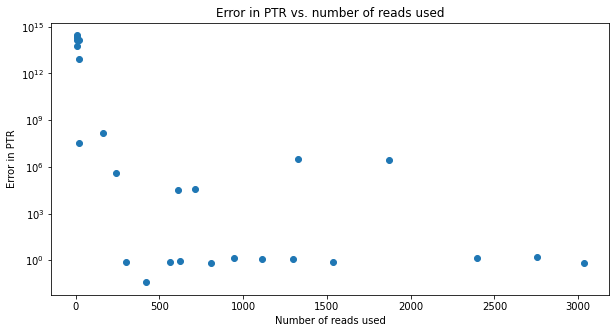

In [129]:
errs = aptr_ptrs[good_both] - coptr_ptrs[good_both]
cols = set(coptr_ptrs.columns) & set(aptr_ptrs.columns)
errs = errs[cols]

fig = plt.figure(figsize=(10, 5))
plt.scatter(
    n_reads[good_both].reindex(errs.index)[cols].values.flatten(),
    np.abs(errs).values.flatten()
)
plt.yscale("log")
# plt.ylim(np.abs(errs).values.min(), 1e17)
plt.xlabel("Number of reads used")
plt.ylabel("Error in PTR")
plt.title("Error in PTR vs. number of reads used")

# Manual exploration

In [130]:
import pickle

db = pickle.load(open("../experiments/synthetic/aptr_out_100/db.pkl", "rb"))
db.db

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
60,575540.3,2,NC_014962,fig|575540.3.rna.55,5377423,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
61,575540.3,2,NC_014962,fig|575540.3.rna.46,4713338,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
62,575540.3,2,NC_014962,fig|575540.3.rna.38,4041636,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,e997d7a3c0c347d96d50214d6ed2f787
95,546269.5,1,CP002390,fig|546269.5.rna.10,719673,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
96,546269.5,1,CP002390,fig|546269.5.rna.33,764888,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
...,...,...,...,...,...,...,...,...,...
7926,471881.3,11,NZ_GG661996,fig|471881.3.rna.29,198505,124357,3749229,tgccagcagccgcggtaatacggagggtgcaagcgttaatcggaat...,cb3a2710c3e4da0ab88cde482a04435a
7957,644284.3,1,NC_014218,fig|644284.3.rna.48,1610087,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,1ad5fe0a24204313cd97864252f30d90
7958,644284.3,1,NC_014218,fig|644284.3.rna.11,493763,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a
7959,644284.3,1,NC_014218,fig|644284.3.rna.35,1073265,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a


In [131]:
otu_table = pd.read_csv("../experiments/synthetic/aptr_out_100/otu_table.tsv", sep='\t', dtype={0: str})
otu_table = otu_table.set_index('#OTU ID')
otu_table.columns = [sample_dict[x] for x in otu_table.columns]
otu_table["genomes"] = [db.find_genomes_by_md5([x]) for x in otu_table.index]
otu_table = otu_table[["genomes", *otu_table.columns[:-1]]]
otu_table = otu_table.sort_values(by="genomes", ascending=False)
otu_table

,genomes,MIX1,MIX2,MIX3,CD4Bx,CD4TisA,CD11Bx,CD11TisA,CD4TisB,CD11TisB,...,MIX7B,MIX8A,MIX8B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B,DON3C
#OTU ID,,,,,,,,,,,,,,,,,,,,,
9dd1c3b75daf034bc431cb886600a4f6,[762550.4],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4cc7fa868f6553cd7b0ff99a67f87641,[714313.3],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3cd7622d7072c198b7d19c6996254301,[701521.8],0,0,0,0,0,0,0,0,0,...,5,0,3,2,0,0,0,0,0,0
1b58e2aa85779bd1db01cd0fed155601,[701521.8],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80f8b4dba9e498d49c3254cd20ebe0f0,[66692.6],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4d891631a5931de4c4de1ac7fa0cfdf0,[640131.3],0,0,0,0,0,0,0,0,0,...,13,14,19,10,0,0,0,0,0,0
fefd61bb00126e4bf352ad4b319a3902,[637910.3],0,0,0,0,0,0,0,0,0,...,1188,3089,2222,2045,0,0,0,0,0,0
27b337b1f5c98c155a3a62984aca8a3f,[637910.3],0,0,0,0,0,0,15,0,39,...,8837,22952,15702,14429,0,0,0,0,0,0
8c3a8045575161030c76b6c5e8b1e5a3,"[592022.4, 1348623.7, 545693.3]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
db["1492.48", "632245.3"]

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
554,1492.48,2,CP013252,fig|1492.48.rna.7,88746,312321,4627894,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,5714236fe9d33d066ddf14f124544c3e
555,1492.48,2,CP013252,fig|1492.48.rna.15,118632,312321,4627894,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,5714236fe9d33d066ddf14f124544c3e
556,1492.48,2,CP013252,fig|1492.48.rna.104,1159997,312321,4627894,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,843e47c34350789a64caac23e1f831f6
557,1492.48,2,CP013252,fig|1492.48.rna.13,103414,312321,4627894,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,9ca46210e53a3721fd5fb464f27c67d8
558,1492.48,2,CP013252,fig|1492.48.rna.36,321837,312321,4627894,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,5714236fe9d33d066ddf14f124544c3e
559,1492.48,2,CP013252,fig|1492.48.rna.9,93872,312321,4627894,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,5714236fe9d33d066ddf14f124544c3e
4344,632245.3,13,NZ_ACOM01000011,fig|632245.3.rna.111,4262,13913,4758422,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,843e47c34350789a64caac23e1f831f6
4345,632245.3,13,NZ_ACOM01000011,fig|632245.3.rna.123,74808,13913,4758422,tgccagcagccgcggtaatacgtaggtggcaagcgttgtccggatt...,5714236fe9d33d066ddf14f124544c3e


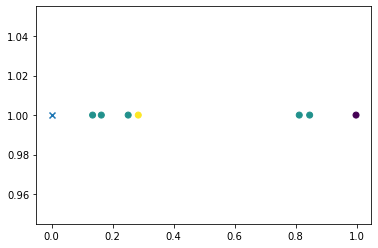

In [133]:
obj, md5s, gen2seq = db.generate_genome_objects("435590.9")

plt.scatter(
    x=obj[0]['pos'].flatten(), 
    y=np.ones(len(obj[0]['pos'])),
    c=obj[0]['seqs']
)
plt.scatter(
    x=db["435590.9"]['oor_position'].iloc[0] / db["435590.9"]['size'].iloc[0],
    y=1,
    marker='x'
)

In [158]:
from src.torch_solver import TorchSolver

good_md5s = ["c89d1de8519a383c4ded7c4c4d749b5a", "8417c6a78dc4334150c2f4df256820ee", "94f128434aaffec0dc3a129f2afad905"]
good_samples = ["MIX1", "MIX2", "MIX3", "CD4Bx", "MIX7A", "MIX7B", "MIX8A", "MIX8B", "MIX9A"]


otus_reduced = otu_table.loc[good_md5s, good_samples]

solver = TorchSolver(
    db=db,
    otus=otus_reduced
)

Using OTU index for md5s


In [159]:
db["435590.9"] # 8417c6a78dc4334150c2f4df256820ee is near OOR
# c89d1de8519a383c4ded7c4c4d749b5a is near trough

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
1526,435590.9,1,NC_009614,fig|435590.9.rna.51,2587719,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,c89d1de8519a383c4ded7c4c4d749b5a
1527,435590.9,1,NC_009614,fig|435590.9.rna.8,346728,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1528,435590.9,1,NC_009614,fig|435590.9.rna.42,2183532,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1529,435590.9,1,NC_009614,fig|435590.9.rna.18,647827,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1530,435590.9,1,NC_009614,fig|435590.9.rna.37,2095440,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1531,435590.9,1,NC_009614,fig|435590.9.rna.101,4743125,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1532,435590.9,1,NC_009614,fig|435590.9.rna.96,4430462,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,8417c6a78dc4334150c2f4df256820ee


In [160]:
otus_reduced / otus_reduced.loc["c89d1de8519a383c4ded7c4c4d749b5a"] 
# This is a problem... we should not see 8417... lower than 1

,MIX1,MIX2,MIX3,CD4Bx,MIX7A,MIX7B,MIX8A,MIX8B,MIX9A
#OTU ID,,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000,1.000000
8417c6a78dc4334150c2f4df256820ee,0.763131,0.770626,0.805970,0.001265,0.709677,1.000000,1.05814,1.175,1.089221
94f128434aaffec0dc3a129f2afad905,5.026430,4.775734,4.919089,2.709587,3.516129,6.529412,5.27907,7.650,5.809696


In [161]:
solver.train(clip=True, verbose=False)
solver.B_hat.exp().detach().numpy()

array([[1.       , 1.       , 1.       , 1.       , 1.       , 1.5530682,
        1.0982003, 2.08533  , 1.2897087]], dtype=float32)

In [162]:
coptr_ptrs.loc["435590.9", good_samples].values

array([1.70696697, 1.72119144, 1.72033188,        nan,        nan,
              nan,        nan,        nan, 1.33015825])

In [141]:
covs / covs.sum(axis=0) * read_counts

array([[ 2899.14298674,  3661.28587796,  1222.9999271 ],
       [14495.71463132, 18306.42900789,  6115.00014579],
       [ 2899.14298674,  3661.28587796,  1222.9999271 ]])

In [142]:
covs = solver(solver.A_hat, solver.B_hat).detach().numpy() 
read_counts = np.sum(otus_reduced.values, axis=0, keepdims=True)
(((covs / covs.sum(axis=0) * read_counts) - otus_reduced.values) ** 2).sum().sum()

1575630305.404869

In [143]:
solver.otu_table

,MIX1,MIX2,MIX3,CD4Bx,MIX7B,MIX8A,MIX8B,MIX9A
#OTU ID,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,2989,3915,1273,7114,17,86,40,1939
94f128434aaffec0dc3a129f2afad905,15024,18697,6262,19276,111,454,306,11265
8417c6a78dc4334150c2f4df256820ee,2281,3017,1026,9,17,91,47,2112


In [144]:
import torch

covs = solver(solver.A_hat, torch.log(2**torch.Tensor([[1.324256, 1.211923, 1.706967]]))).detach().numpy() 
read_counts = np.sum(otus_reduced.values, axis=0, keepdims=True)
(((covs / covs.sum(axis=0) * read_counts) - solver.otu_table)**2).sum().sum()

RuntimeError: The size of tensor a (8) must match the size of tensor b (3) at non-singleton dimension 1